In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from time import sleep
from os import listdir
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation as FA

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [3]:
#folder_path = './CMAPSSData/'

#listdir(folder_path)

file_name = 'FD001.txt'

df_train = pd.read_csv('train_' + file_name, header = None, sep = ' ')
df_test = pd.read_csv( 'test_'+file_name, header = None, sep = ' ')
rul_test = pd.read_csv('RUL_'+file_name, header = None)

for df in [df_train, df_test, rul_test]:
    display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


,0
0,112
1,98
2,69
3,82
4,91


In [4]:
col_names = []

col_names.append('unit')
col_names.append('time')

for i in range(1,4):
    col_names.append('os'+str(i))
for i in range(1,22):
    col_names.append('s'+str(i))

df_train = df_train.iloc[:,:-2].copy()
df_train.columns = col_names
display(df_train.head())

df_test = df_test.iloc[:,:-2].copy()
df_test.columns = col_names
display(df_test.head())

,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
max(df_train['unit'])


100

In [6]:
rul_list = []
engine_numbers = max(df_train['unit'])
for n in np.arange(1,engine_numbers+1):
    
    time_list = np.array(df_train[df_train['unit'] == n]['time'])
    length = len(time_list)
    rul = list(length - time_list)
    rul_list += rul
    
df_train['rul'] = rul_list

rul_list = []

for n in np.arange(1,engine_numbers+1):
    
    time_list = np.array(df_test[df_test['unit'] == n]['time'])
    length = len(time_list)
    rul_val = rul_test.iloc[n-1].item()
    rul = list(length - time_list + rul_val)
    rul_list += rul

df_test['rul'] = rul_list

for df in [df_train, df_test]:
    display(df.head())

,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


,unit,time,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,rul
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138


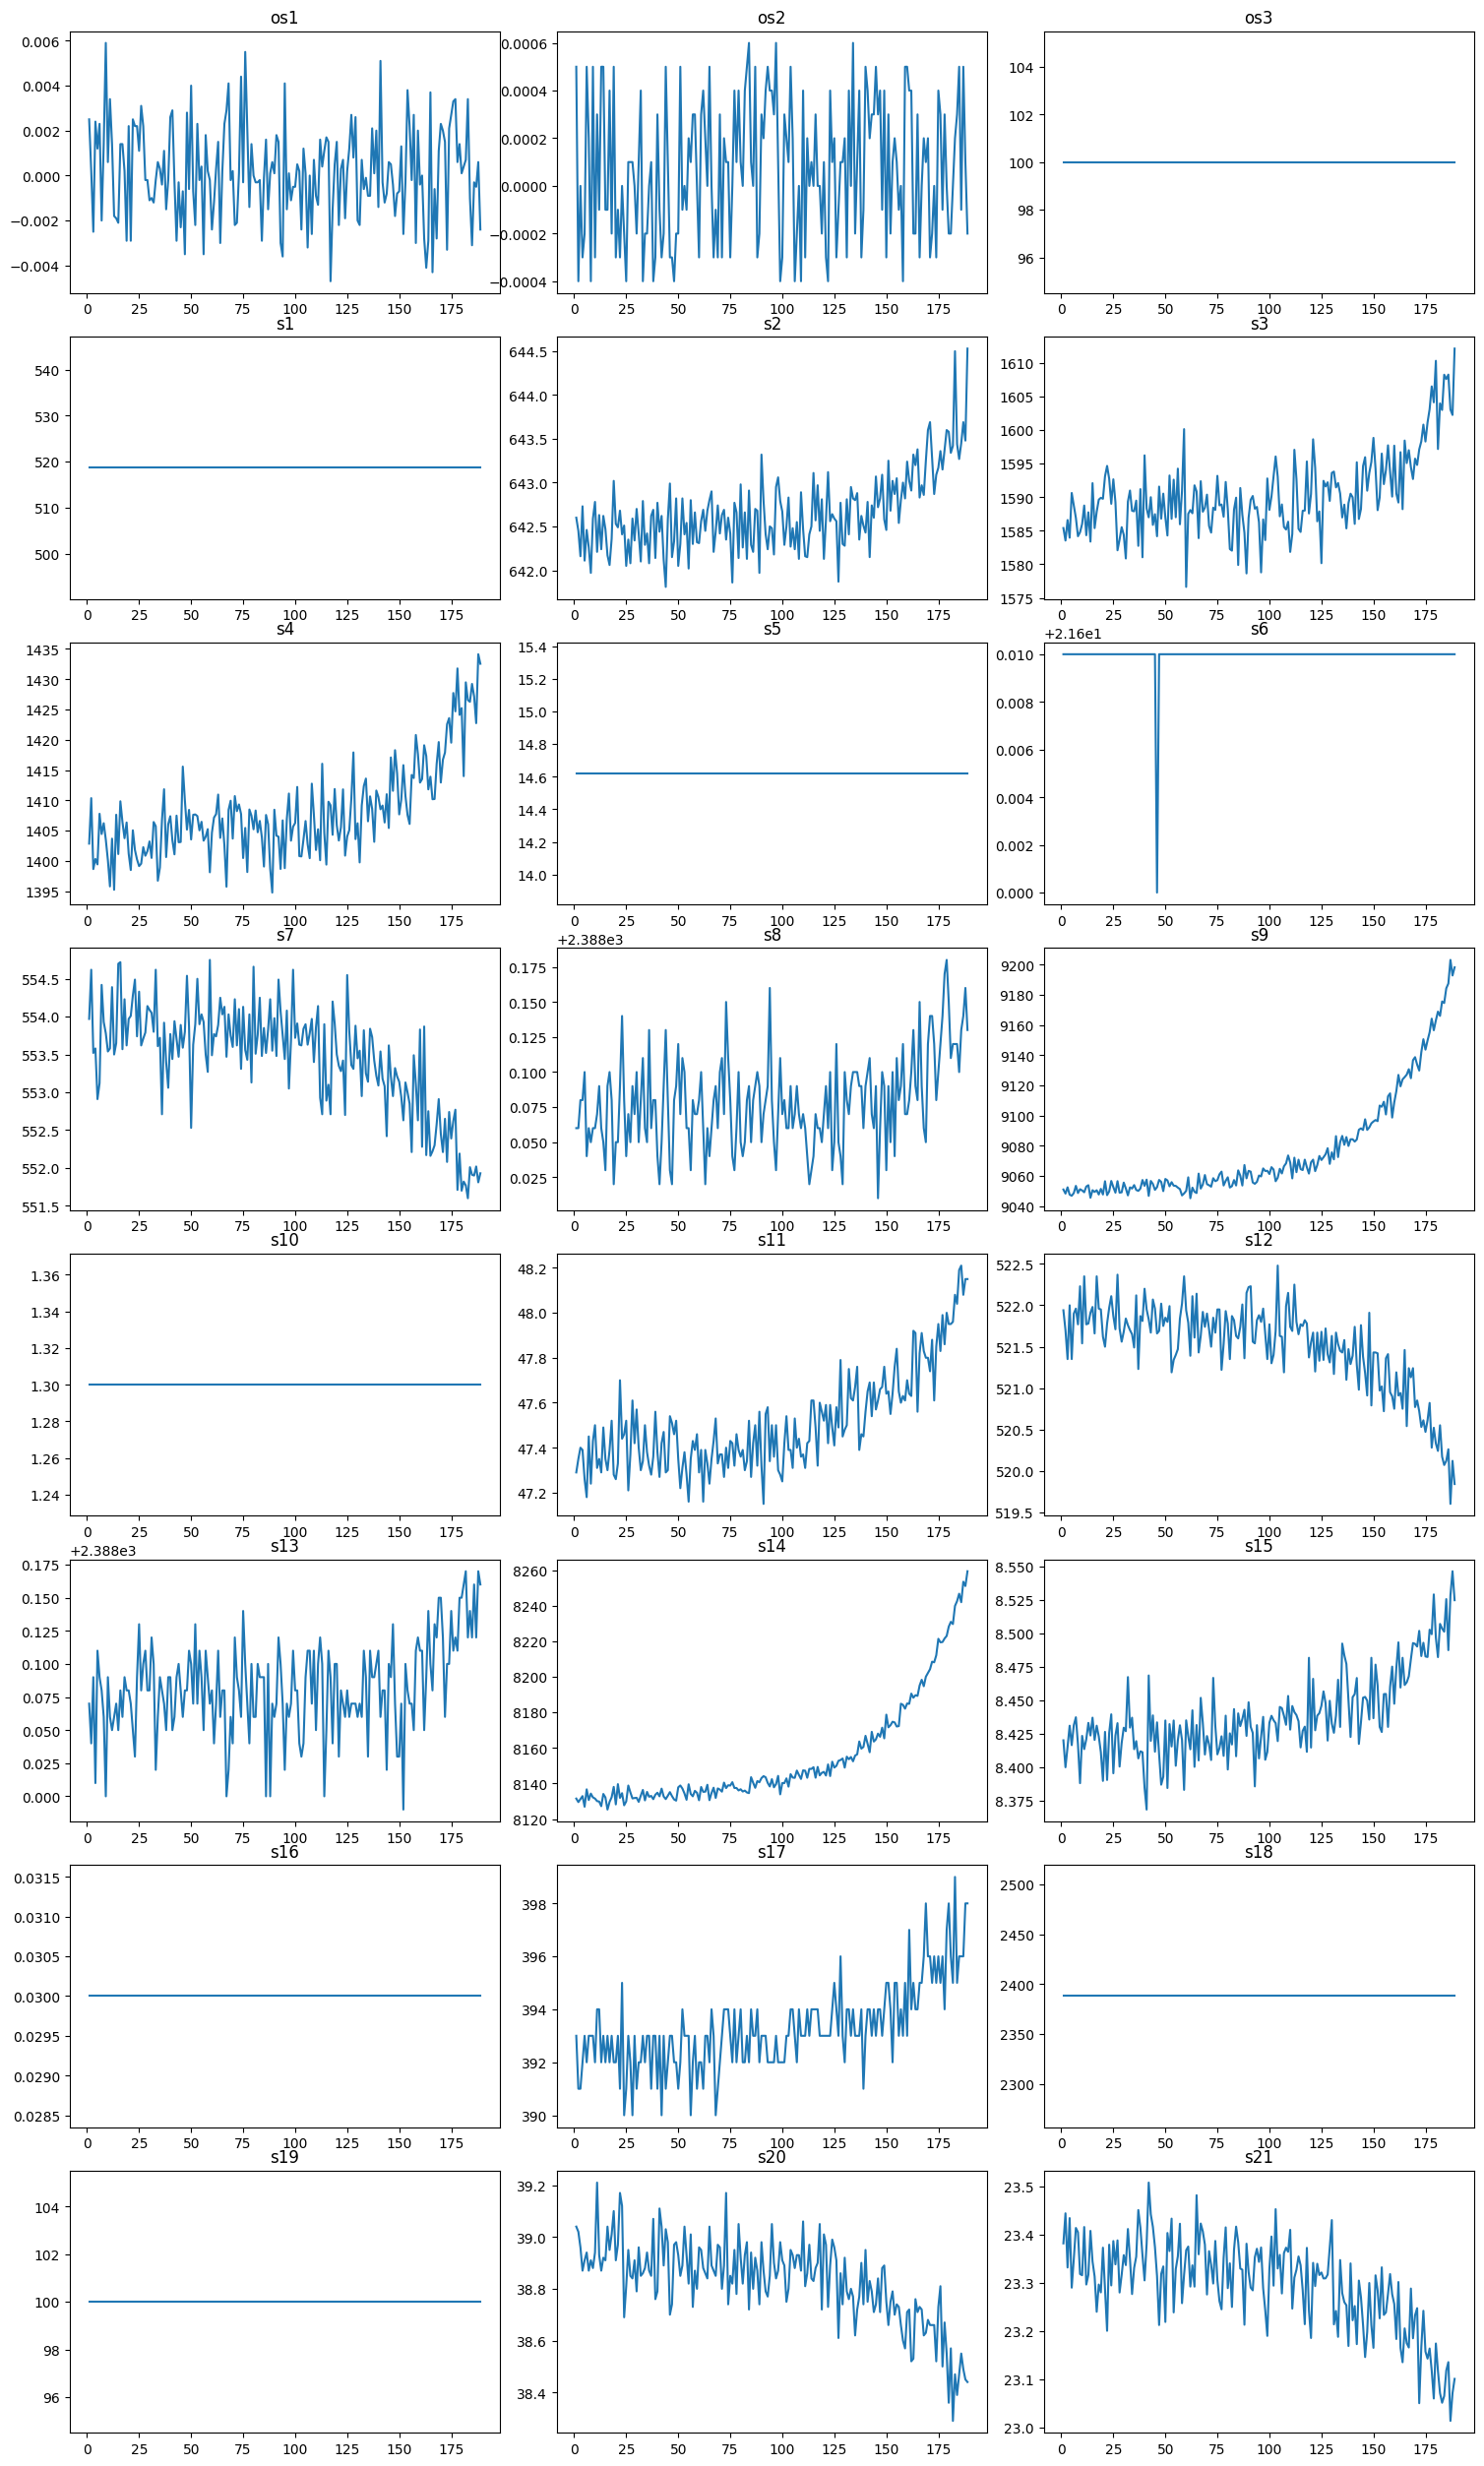

In [7]:
sample = 4
sample_df = df_train[df_train['unit'] == sample].copy()

fig, axes = plt.subplots(8,3, figsize = (15,25))
fig.tight_layout()

j = -1
for c in df_train.columns:
    
    if 's' in c:
        j += 1
        axes[j // 3, j % 3].plot(sample_df['time'], sample_df[c])
        axes[j // 3, j % 3].set_title(c)

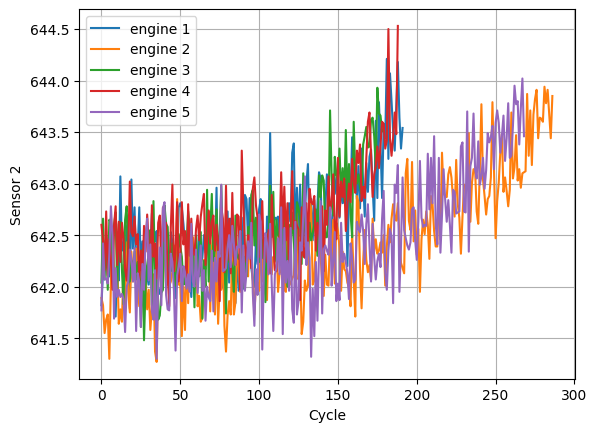

In [8]:
sensor = 's2'
for sample in range(1,6):
    sample_df = df_train[df_train['unit'] == sample].copy()
    sensordata = sample_df[sensor].to_numpy()
    plt.plot(sensordata, label = "engine "+str(sample))
plt.grid()
plt.legend()
plt.ylabel('Sensor 2')
plt.xlabel('Cycle')
plt.show()

In [9]:
df_train[['os3','s1','s5','s6','s10','s16','s18','s19']].describe()

,os3,s1,s5,s6,s10,s16,s18,s19
count,20631.0,20631.00,2.063100e+04,20631.000000,20631.0,2.063100e+04,20631.0,20631.0
mean,100.0,518.67,1.462000e+01,21.609803,1.3,3.000000e-02,2388.0,100.0
std,0.0,0.00,1.776400e-15,0.001389,0.0,1.387812e-17,0.0,0.0
min,100.0,518.67,1.462000e+01,21.600000,1.3,3.000000e-02,2388.0,100.0
25%,100.0,518.67,1.462000e+01,21.610000,1.3,3.000000e-02,2388.0,100.0
50%,100.0,518.67,1.462000e+01,21.610000,1.3,3.000000e-02,2388.0,100.0
75%,100.0,518.67,1.462000e+01,21.610000,1.3,3.000000e-02,2388.0,100.0
max,100.0,518.67,1.462000e+01,21.610000,1.3,3.000000e-02,2388.0,100.0


In [10]:
#Drop os3, s1, s5, s6, s10, s16, s18, s19 from both train and test
drop_cols1 = ['os3','s1','s5','s6','s10','s16','s18','s19']

df_train = df_train.drop(drop_cols1, axis = 1)
df_test = df_test.drop(drop_cols1, axis = 1)

for df in [df_train, df_test]:
    display(df.head())

,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138


In [11]:
#Minmax Scaling
minmax_dict = {}

for c in df_train.columns:
    if 's' in c:
        minmax_dict[c+'min'] = df_train[c].min()
        minmax_dict[c+'max']=  df_train[c].max()
        
for c in df_train.columns:
    if 's' in c:
        df_train[c] = (df_train[c] - minmax_dict[c+'min']) / (minmax_dict[c+'max'] - minmax_dict[c+'min'])
        
for c in df_test.columns:
    if 's' in c:
        df_test[c] = (df_test[c] - minmax_dict[c+'min']) / (minmax_dict[c+'max'] - minmax_dict[c+'min'])
        
for df in [df_train, df_test]:
    display(df.head())

,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187


,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.632184,0.750000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834,142
1,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827,141
2,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348,140
3,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110,139
4,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377,138


In [12]:
#Smoothing Function: Exponentially Weighted Averages

def smooth(s, b = 0.98):

    v = np.zeros(len(s)+1) #v_0 is already 0.
    bc = np.zeros(len(s)+1)

    for i in range(1, len(v)): #v_t = 0.95
        v[i] = (b * v[i-1] + (1-b) * s[i-1]) 
        bc[i] = 1 - b**i

    sm = v[1:] / bc[1:]
    
    return sm

s = [1,2,3,4,5]
print(s)
print(f'After Smoothing: {smooth(s)}')

[1, 2, 3, 4, 5]
After Smoothing: [1.         1.50505051 2.01346756 2.52525046 3.04039827]


In [13]:
#Smoothing each time series for each engine in both training and test sets

for c in df_train.columns:
    
    if 's' in c:
        sm_list = []

        for n in np.arange(1,101):
            s = np.array(df_train[df_train['unit'] == n][c].copy())
            sm = list(smooth(s, 0.98))
            sm_list += sm
        
        df_train[c+'_smoothed'] = sm_list
        
for c in df_test.columns:
    
    if 's' in c:
        sm_list = []

        for n in np.arange(1,101):
            s = np.array(df_test[df_test['unit'] == n][c].copy())
            sm = list(smooth(s, 0.98))
            sm_list += sm
        
        df_test[c+'_smoothed'] = sm_list

In [14]:
df_train.columns

Index(['unit', 'time', 'os1', 'os2', 's2', 's3', 's4', 's7', 's8', 's9', 's11',
       's12', 's13', 's14', 's15', 's17', 's20', 's21', 'rul', 'os1_smoothed',
       'os2_smoothed', 's2_smoothed', 's3_smoothed', 's4_smoothed',
       's7_smoothed', 's8_smoothed', 's9_smoothed', 's11_smoothed',
       's12_smoothed', 's13_smoothed', 's14_smoothed', 's15_smoothed',
       's17_smoothed', 's20_smoothed', 's21_smoothed'],
      dtype='object')

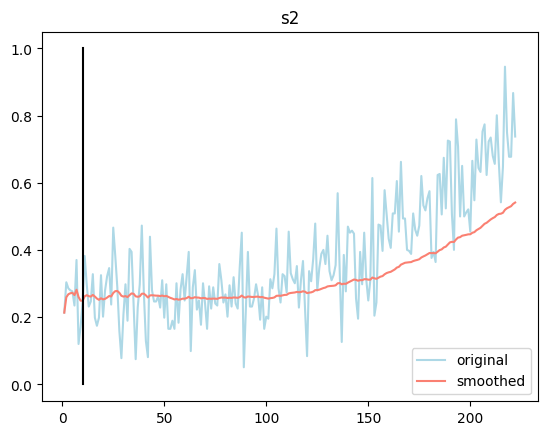

In [15]:
sample = 10
sample_df = df_train[df_train['unit'] == sample].copy()

# fig, axes = plt.subplots(6,3, figsize = (15,25))
fig = plt.figure()
# fig.tight_layout()

j = -1
c = 's2'
plt.plot(sample_df['time'], sample_df[c], c = 'lightblue', label = 'original')
plt.plot(sample_df['time'], sample_df[c+'_smoothed'], c = 'salmon', label = 'smoothed')
plt.plot([10,10],[0,1], c = 'black')
plt.title(c)
plt.legend()
# for c in df_train.columns:
    
#     if ('s' in c) and ('smoothed' not in c):
#         j += 1
#         axes[j // 3, j % 3].plot(sample_df['time'], sample_df[c], c = 'lightblue', label = 'original')
#         axes[j // 3, j % 3].plot(sample_df['time'], sample_df[c+'_smoothed'], c = 'salmon', label = 'smoothed')
#         axes[j // 3, j % 3].plot([10,10],[0,1], c = 'black')
#         axes[j // 3, j % 3].set_title(c)
#         axes[j // 3, j % 3].legend()

In [16]:
#Remove the original series

for c in df_train.columns:
    if ('s' in c) and ('smoothed' not in c):
        df_train[c] = df_train[c+'_smoothed']
        df_train.drop(c+'_smoothed', axis = 1, inplace = True)
        
for c in df_test.columns:
    if ('s' in c) and ('smoothed' not in c):
        df_test[c] = df_test[c+'_smoothed']
        df_test.drop(c+'_smoothed', axis = 1, inplace = True)
        
for df in [df_train, df_test]:
    display(df.head())

,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.535237,0.208754,0.233936,0.430144,0.331412,0.676638,0.227120,0.104951,0.375060,0.700028,0.243018,0.181025,0.387888,0.333333,0.689688,0.727870,190
2,1,3,0.439208,0.392826,0.271154,0.409527,0.344714,0.688033,0.242630,0.116885,0.332528,0.732432,0.235390,0.177885,0.377535,0.276652,0.668677,0.691652,189
3,1,4,0.465234,0.420437,0.289760,0.370016,0.341231,0.701612,0.262094,0.118852,0.289798,0.772801,0.250520,0.177113,0.323193,0.291254,0.644194,0.684112,188
4,1,5,0.449741,0.402305,0.302174,0.346587,0.354428,0.694673,0.258000,0.125327,0.282753,0.767278,0.247350,0.176618,0.339614,0.317360,0.632735,0.688357,187


,unit,time,os1,os2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,rul
0,1,1,0.632184,0.750000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834,142
1,1,2,0.487054,0.497475,0.345899,0.345454,0.245626,0.729436,0.189164,0.137245,0.298521,0.693438,0.242870,0.168831,0.260578,0.375421,0.620781,0.674457,141
2,1,3,0.497321,0.526674,0.356308,0.345854,0.271685,0.714661,0.202125,0.144331,0.328579,0.695452,0.235292,0.164345,0.327936,0.389448,0.657477,0.690404,140
3,1,4,0.560197,0.519802,0.359960,0.330216,0.306804,0.705615,0.200797,0.134383,0.309869,0.664050,0.239081,0.165825,0.309667,0.353523,0.659845,0.683115,139
4,1,5,0.564415,0.515680,0.366539,0.334768,0.312057,0.703206,0.193692,0.127725,0.302363,0.679389,0.235232,0.163103,0.307839,0.314626,0.659651,0.690038,138


In [17]:
print('training set time cycles:')
display(df_train.groupby('unit')['time'].max().describe())
print('test set time cycles:')
display(df_test.groupby('unit')['time'].max().describe())

training set time cycles:


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time, dtype: float64

test set time cycles:


count    100.000000
mean     130.960000
std       53.593479
min       31.000000
25%       88.750000
50%      133.500000
75%      164.250000
max      303.000000
Name: time, dtype: float64

In [18]:
n_features = len([c for c in df_train.columns if 's' in c]) #plus one for time
window = 20
print(f'number of features: {n_features}, window size: {window}')

number of features: 16, window size: 20


In [19]:
np.random.seed(5)
units = np.arange(1,101)
train_units = list(np.random.choice(units, 80, replace = False))
val_units = list(set(units) - set(train_units))
print(val_units)

[8, 9, 16, 17, 28, 31, 45, 54, 62, 63, 66, 74, 76, 77, 78, 79, 81, 91, 93, 100]


In [20]:
train_data = df_train[df_train['unit'].isin(train_units)].copy()
val_data = df_train[df_train['unit'].isin(val_units)].copy()

train_indices = list(train_data[(train_data['rul'] >= (window - 1)) & (train_data['time'] > 10)].index)
val_indices = list(val_data[(val_data['rul'] >= (window - 1)) & (val_data['time'] > 10)].index)

In [21]:
class data(Dataset):
    
    def __init__(self, list_indices, df_train):
        
        self.indices = list_indices
        self.df_train = df_train
        
    def __len__(self):
        
        return len(self.indices)
    
    def __getitem__(self, idx):
        
        ind = self.indices[idx]
        X_ = self.df_train.iloc[ind : ind + 20, :].drop(['time','unit','rul'], axis = 1).copy().to_numpy()
        y_ = self.df_train.iloc[ind + 19]['rul']
        
        return X_, y_
    
torch.manual_seed(5)
    
train = data(train_indices, df_train)
val = data(val_indices, df_train)

trainloader = DataLoader(train, batch_size = 64, shuffle = True)
valloader = DataLoader(val, batch_size = len(val_indices), shuffle = True)

units = np.arange(1,101)

class test(Dataset):
    
    def __init__(self, units, df_test):
        
        self.units = units
        self.df_test = df_test
        
    def __len__(self):
        
        return len(self.units)
    
    def __getitem__(self, idx):
        
        n = self.units[idx]
        U = self.df_test[self.df_test['unit'] == n].copy()
        X_ = U.reset_index().iloc[-20:,:].drop(['time','index','unit','rul'], axis = 1).copy().to_numpy()
        y_ = U['rul'].min()
        
        return X_, y_
    
test = test(units, df_test)
testloader = DataLoader(test, batch_size = 100)

In [22]:
dataiter = iter(trainloader)
x,y = next(dataiter)
x.shape

torch.Size([64, 20, 16])

In [23]:
## Custom loss function
class CustomLoss(nn.Module):
    def __init__(self, alpha):
        super(CustomLoss, self).__init__()
        self.alpha = alpha

    def forward(self, predictions, targets):
        return torch.mean((predictions - targets) ** 2) + self.alpha*(torch.mean(torch.relu(predictions-targets)))

In [24]:
import matplotlib.pyplot as pyplot

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = 'cuda'
# device = 'cpu'


class LSTMRegressor(nn.Module):
    
    def __init__(self, n_features, hidden_units):
        super().__init__()
        self.n_features = n_features
        self.hidden_units = hidden_units
        self.n_layers = 1
        self.lstm = nn.LSTM(input_size = n_features, hidden_size = self.hidden_units, batch_first = True, num_layers = self.n_layers)
        self.linear1 = nn.Linear(in_features=self.hidden_units, out_features=12)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=12, out_features=12)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(in_features=12, out_features=1)
        
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.n_layers, batch_size, self.hidden_units,device=x.device).requires_grad_()
        c0 = torch.zeros(self.n_layers, batch_size, self.hidden_units,device=x.device).requires_grad_()
        
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear1(hn[0])
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out).flatten()
        
        return out
    
learning_rate = 0.001
n_hidden_units = 12

torch.manual_seed(15)

model = LSTMRegressor(n_features, n_hidden_units).to(device)
# loss_fn = nn.MSELoss()
alpha = 0.4
loss_fn = CustomLoss(alpha)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                             
ks = [key for key in model.state_dict().keys() if 'linear' in key and '.weight' in key]

for k in ks:
    nn.init.kaiming_uniform_(model.state_dict()[k])
    
bs = [key for key in model.state_dict().keys() if 'linear' in key and '.bias' in key]

for b in bs:
    nn.init.constant_(model.state_dict()[b], 0)

In [26]:
def validation():
    
    model.eval()
    X, y = next(iter(valloader))
    X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
    
    with torch.no_grad():
        y_pred = model(X)
        val_loss = loss_fn(y_pred, y).item()
        
    return val_loss

loss_L1 = nn.L1Loss()
    
def test():
    model.eval()
    X, y = next(iter(testloader))
    X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
    
    with torch.no_grad():
        y_pred = model(X)
        # y_pred = torch.round(y_pred)
        test_loss_MSE = torch.mean((y_pred - y) ** 2).item() #loss_fn(y_pred, y).item()
        test_loss_L1 = loss_L1(y_pred, y).item()
        test_ASUE = (torch.mean(torch.relu(y-y_pred))).item()
        
    return test_loss_MSE, test_loss_L1, test_ASUE, y_pred, y

In [27]:
T = []
V = []
epochs = 35

loss_fn = nn.MSELoss()
for i in tqdm(range(epochs)):
    
    L = 0
    model.train()
    
    for batch, (X,y) in enumerate(trainloader):
        
        X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        L += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # alpha = alpha*(1 +((y<y_pred).count_nonzero().item()/len(y)+0.5))
        # loss_fn = CustomLoss(alpha)
        # print(alpha)
    val_loss = validation()
    
    T.append(L/len(trainloader))
    V.append(val_loss)
    (y<y_pred).count_nonzero().item()/len(y)
    # if (i+1) % 10 == 0:
    #     sleep(0.5)
    print(f'epoch:{i+1}, avg_train_loss:{L/len(trainloader)}, val_loss:{val_loss}')

  3%|██▎                                                                                | 1/35 [00:24<14:01, 24.75s/it]

epoch:1, avg_train_loss:11346.591446868086, val_loss:5836.533203125


  6%|████▋                                                                              | 2/35 [00:46<12:38, 22.98s/it]

epoch:2, avg_train_loss:5139.891714450532, val_loss:3055.435791015625


  9%|███████                                                                            | 3/35 [01:08<12:01, 22.55s/it]

epoch:3, avg_train_loss:4003.1264399975803, val_loss:3121.271240234375


 11%|█████████▍                                                                         | 4/35 [01:30<11:29, 22.25s/it]

epoch:4, avg_train_loss:4004.9277894686807, val_loss:3103.6279296875


 14%|███████████▊                                                                       | 5/35 [01:51<10:59, 21.97s/it]

epoch:5, avg_train_loss:4004.138614620783, val_loss:3097.65380859375


 17%|██████████████▏                                                                    | 6/35 [02:13<10:32, 21.82s/it]

epoch:6, avg_train_loss:3945.7802043003317, val_loss:2570.729248046875


 20%|████████████████▌                                                                  | 7/35 [02:35<10:11, 21.84s/it]

epoch:7, avg_train_loss:2587.9432918582343, val_loss:1599.5826416015625


 23%|██████████████████▉                                                                | 8/35 [02:57<09:51, 21.92s/it]

epoch:8, avg_train_loss:2079.396775777361, val_loss:1334.46923828125


 26%|█████████████████████▎                                                             | 9/35 [03:19<09:31, 21.97s/it]

epoch:9, avg_train_loss:1886.4963732694102, val_loss:1453.050048828125


 29%|███████████████████████▍                                                          | 10/35 [03:41<09:08, 21.94s/it]

epoch:10, avg_train_loss:1673.1693444716193, val_loss:1206.39013671875


 31%|█████████████████████████▊                                                        | 11/35 [04:03<08:48, 22.03s/it]

epoch:11, avg_train_loss:1481.4980131166171, val_loss:1103.1781005859375


 34%|████████████████████████████                                                      | 12/35 [04:25<08:26, 22.02s/it]

epoch:12, avg_train_loss:1351.0717789641524, val_loss:812.97998046875


 37%|██████████████████████████████▍                                                   | 13/35 [04:50<08:26, 23.03s/it]

epoch:13, avg_train_loss:1296.9478450538838, val_loss:821.1972045898438


 40%|████████████████████████████████▊                                                 | 14/35 [05:16<08:18, 23.75s/it]

epoch:14, avg_train_loss:1180.898899314678, val_loss:753.1331787109375


 43%|███████████████████████████████████▏                                              | 15/35 [05:39<07:53, 23.65s/it]

epoch:15, avg_train_loss:1128.624933968603, val_loss:744.7077026367188


 46%|█████████████████████████████████████▍                                            | 16/35 [06:03<07:30, 23.69s/it]

epoch:16, avg_train_loss:1066.8257336911902, val_loss:688.6702880859375


 49%|███████████████████████████████████████▊                                          | 17/35 [06:25<06:56, 23.15s/it]

epoch:17, avg_train_loss:1038.6838234420372, val_loss:726.684326171875


 51%|██████████████████████████████████████████▏                                       | 18/35 [06:46<06:24, 22.63s/it]

epoch:18, avg_train_loss:1012.8346815531232, val_loss:692.015380859375


 54%|████████████████████████████████████████████▌                                     | 19/35 [07:08<05:57, 22.33s/it]

epoch:19, avg_train_loss:1016.1501950964464, val_loss:849.3412475585938


 57%|██████████████████████████████████████████████▊                                   | 20/35 [07:30<05:32, 22.16s/it]

epoch:20, avg_train_loss:979.4008798514848, val_loss:710.4452514648438


 60%|█████████████████████████████████████████████████▏                                | 21/35 [07:53<05:15, 22.52s/it]

epoch:21, avg_train_loss:992.6975259696488, val_loss:909.2669067382812


 63%|███████████████████████████████████████████████████▌                              | 22/35 [08:16<04:54, 22.69s/it]

epoch:22, avg_train_loss:927.1577608901842, val_loss:775.2274169921875


 66%|█████████████████████████████████████████████████████▉                            | 23/35 [08:38<04:27, 22.33s/it]

epoch:23, avg_train_loss:928.1783202854933, val_loss:844.044189453125


 69%|████████████████████████████████████████████████████████▏                         | 24/35 [08:59<04:03, 22.15s/it]

epoch:24, avg_train_loss:913.5999461486276, val_loss:657.4134521484375


 71%|██████████████████████████████████████████████████████████▌                       | 25/35 [09:21<03:39, 21.98s/it]

epoch:25, avg_train_loss:886.986070751089, val_loss:705.9228515625


 74%|████████████████████████████████████████████████████████████▉                     | 26/35 [09:42<03:16, 21.83s/it]

epoch:26, avg_train_loss:891.8076055746163, val_loss:683.9057006835938


 77%|███████████████████████████████████████████████████████████████▎                  | 27/35 [10:04<02:54, 21.76s/it]

epoch:27, avg_train_loss:885.5310840437897, val_loss:705.5835571289062


 80%|█████████████████████████████████████████████████████████████████▌                | 28/35 [10:26<02:32, 21.76s/it]

epoch:28, avg_train_loss:898.6097772648905, val_loss:617.6080932617188


 83%|███████████████████████████████████████████████████████████████████▉              | 29/35 [10:48<02:10, 21.83s/it]

epoch:29, avg_train_loss:865.0113216163837, val_loss:634.2664184570312


 86%|██████████████████████████████████████████████████████████████████████▎           | 30/35 [11:09<01:48, 21.75s/it]

epoch:30, avg_train_loss:861.370404268788, val_loss:617.2048950195312


 89%|████████████████████████████████████████████████████████████████████████▋         | 31/35 [11:31<01:26, 21.71s/it]

epoch:31, avg_train_loss:885.9784194811256, val_loss:741.0499267578125


 91%|██████████████████████████████████████████████████████████████████████████▉       | 32/35 [11:53<01:05, 21.73s/it]

epoch:32, avg_train_loss:843.4451719300937, val_loss:637.9029541015625


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 33/35 [12:14<00:43, 21.65s/it]

epoch:33, avg_train_loss:854.9495701072491, val_loss:726.9877319335938


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 34/35 [12:36<00:21, 21.60s/it]

epoch:34, avg_train_loss:841.0379549549745, val_loss:747.6913452148438


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [12:57<00:00, 22.21s/it]

epoch:35, avg_train_loss:829.499169003647, val_loss:779.7626953125


In [28]:
torch.save(model.state_dict(), f'saved_models\\LSTM_{alpha}')

In [29]:
mse, l1,asue, y_pred, y = test()

print(f'Test MSE:{round(mse,2)}, L1:{round(l1,2)}, ASUE:{round(asue,2)}')
print(f'MSE of overesitmated: {round(torch.mean(1*(y_pred>y)*(y_pred - y) ** 2).item(),2)}')

Test MSE:891.72, L1:21.6, ASUE:1.91
MSE of overesitmated: 855.98


In [30]:
asue

1.9099030494689941

In [31]:
print(y)
print(y_pred)
print(1*(y_pred>y))

tensor([112.,  98.,  69.,  82.,  91.,  93.,  91.,  95., 111.,  96.,  97., 124.,
         95., 107.,  83.,  84.,  50.,  28.,  87.,  16.,  57., 111., 113.,  20.,
        145., 119.,  66.,  97.,  90., 115.,   8.,  48., 106.,   7.,  11.,  19.,
         21.,  50., 142.,  28.,  18.,  10.,  59., 109., 114.,  47., 135.,  92.,
         21.,  79., 114.,  29.,  26.,  97., 137.,  15., 103.,  37., 114., 100.,
         21.,  54.,  72.,  28., 128.,  14.,  77.,   8., 121.,  94., 118.,  50.,
        131., 126., 113.,  10.,  34., 107.,  63.,  90.,   8.,   9., 137.,  58.,
        118.,  89., 116., 115., 136.,  28.,  38.,  20.,  85.,  55., 128., 137.,
         82.,  59., 117.,  20.], device='cuda:0')
tensor([112.2243, 142.5371,  80.9545, 104.3426,  98.0860, 136.9750, 127.8485,
         99.4985, 163.5820,  99.9739, 119.1680, 121.8735,  96.8109, 161.2964,
        123.2577, 112.0154,  49.3112,  47.2994, 125.1814,  22.3274,  90.9862,
        151.7289, 114.3873,  15.0598, 169.1297, 181.2635,  76.6829, 115.8421

(0.0, 200.0)

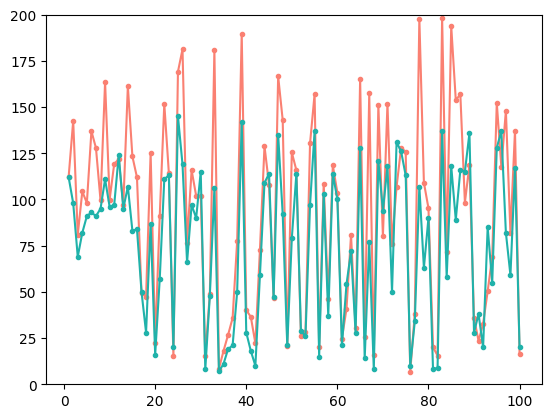

In [32]:
# fig, ax = plt.subplots( figsize = (14,8))
# plt.subplot(1,2,1)
plt.plot(np.arange(1,101), y_pred.cpu().numpy(), label = 'predictions', c = 'salmon', marker = '.')
ax1 = plt.gca()
ax1.set_ylim([0, 200])


plt.plot(np.arange(1,101), y.cpu().numpy(), label = 'true values', c = 'lightseagreen', marker = '.')
ax2 = plt.gca()
ax2.set_ylim([0, 200])

# # plt.set_xlabel('Test Engine Units', fontsize = 16)
# # plt.set_ylabel('RUL', fontsize = 16)
# ax.grid(True)
# ax.legend()
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

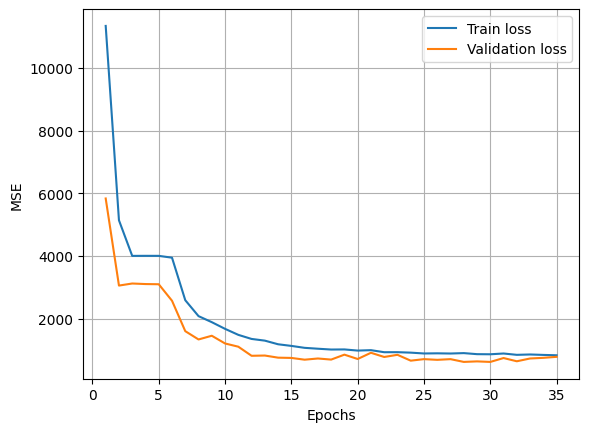

In [33]:
plt.plot(np.arange(1,len(T)+1), T, label= 'Train loss')
plt.plot(np.arange(1,len(V)+1), V, label = 'Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show

In [34]:
fig, ax = plt.subplots(figsize = (12,8))

def animate(i):
    ax.clear()
    line1, = ax.plot(np.arange(1,i+1), T[:i], label = 'train_loss')
    line2, = ax.plot(np.arange(1,i+1), V[:i], label = 'val_loss')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0,101)
    ax.set_ylim(0,4000)
    ax.set_xlabel('epochs')
    ax.set_ylabel('MSE')
                     
    return line1, line2
                     
    
animation = FA(fig, animate, np.arange(1,len(T)+1), interval = 50)

%time animation.save('animation3.gif', writer='imagemagick', fps=20)

plt.close(fig)

MovieWriter imagemagick unavailable; using Pillow instead.


CPU times: total: 6.17 s
Wall time: 6.16 s


In [35]:
from torchinfo import summary
summary(model, input_size=(64,20,16))

Layer (type:depth-idx)                   Output Shape              Param #
LSTMRegressor                            [64]                      --
├─LSTM: 1-1                              [64, 20, 12]              1,440
├─Linear: 1-2                            [64, 12]                  156
├─ReLU: 1-3                              [64, 12]                  --
├─Linear: 1-4                            [64, 12]                  156
├─ReLU: 1-5                              [64, 12]                  --
├─Linear: 1-6                            [64, 1]                   13
Total params: 1,765
Trainable params: 1,765
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.86
Input size (MB): 0.08
Forward/backward pass size (MB): 0.14
Params size (MB): 0.01
Estimated Total Size (MB): 0.22

In [42]:
model.load_state_dict(torch.load('saved_models\\LSTM'))

<All keys matched successfully>

In [37]:
1*(y_pred < y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1], device='cuda:0')

In [38]:
torch.dot(y - y_pred, 1.0*(y_pred<y)).item()/len(y)

1.9099032592773437

In [39]:
torch.sum(torch.abs(y-y_pred)).item()/len(y)

21.6042236328125

In [40]:
## Checking what percentage of the predictions are higher than the true values
(y<y_pred).count_nonzero().item()/len(y)

0.82

In [41]:
torch.save(model.state_dict(), 'saved_models\\LSTM')